**Part 3 - Mapping Closure in 3D for f_WBZ using the IEM**

This notebook implements the interaction by exchange with the mean model (VCIEM) as discussed by (Pope, S.B. 2010), in order to obtain a closure for the Boussinesq equations.

*Deterministic equations*

We solve the Boussinesq equations

\begin{align}
    \frac{D \boldsymbol{U} }{Dt} &= -\nabla P + Ri_B \, B \boldsymbol{\hat{z}} + Re^{-1} \Delta \boldsymbol{U} + \overbrace{\boldsymbol{U}/\langle |\boldsymbol{U}|^2 \rangle}^{:= F}, \\
    \frac{D B }{Dt}              &= -W + Pe^{-1} \Delta B, \\  
    \nabla \cdot \boldsymbol{U}  &= 0, 
\end{align}

in a periodic domain subject to the Lundgren forcing $F = \epsilon \boldsymbol{U}/\langle |\boldsymbol{U}|^2 \rangle$, where $B$ is the buoyancy perturbation from the stably stratified base state, $Re$ the Reynolds number and $Pe = Pr Re$ the Peclet number. Letting the (eventual) dissipation rate be defined by $\epsilon$, we choose the scales

\begin{equation}
L* = L, \quad U* = (\epsilon L)^{1/3}, \quad t* = L^{(2/3)} \epsilon^{(-1/3)},
\end{equation}

giving

\begin{equation}
Ri_B = N^2 L^{4/3} / \epsilon^{(2/3)}, \quad Re   = \epsilon^{1/3} L^{4/3} / \nu, \quad Pr = \nu/\kappa,
\end{equation}

where $N^2 = dB/dz$ is the Brunt-Vaisala frequency. These parameters are related to those of A. Maffioli et al. JFM (2016) by 

\begin{equation}
Fr^2 = 1/Ri_B, \quad  Re_B = Re Fr^2.
\end{equation}

*PDF equations*

We model the time evolution of the PDF $f_{\boldsymbol{Y}}$ in terms of the random variables $\boldsymbol{Y} = (W,B,Z)$ which gives the evolvution equation

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) =   
    - \frac{\partial }{\partial b} \left( \left[ -w + Pe^{-1} \mathbb{E}_{\boldsymbol{Y}}[ \Delta B ] \right] f_{\boldsymbol{Y}} \right) 
    - \frac{\partial }{\partial w} \left( \left[ \mathbb{E}_{\boldsymbol{Y}}[ Ri_B B -\nabla_Z P] +  \mathbb{E}_{\boldsymbol{Y}}[ \frac{W}{\langle |\boldsymbol{U}|^2 \rangle}] + Re^{-1} \mathbb{E}_{\boldsymbol{Y}}[ \Delta W ] \right] f_{\boldsymbol{Y}} \right). %
\end{equation}


Terms $\mathbb{E}_{\boldsymbol{Y}}[\Delta B ]$ and $\mathbb{E}_{\boldsymbol{Y}}[\Delta W ]$ are responsible for micro-scale molecular mixing locally in buoyancy space and for viscous dissipation in velocity space, $\mathbb{E}_{\boldsymbol{Y}}[-\nabla_Z P ]$ is responsible for ensuring incompressibility, and $\mathbb{E}_{\boldsymbol{Y}}[ \frac{W}{\langle |\boldsymbol{U}|^2 \rangle}]$ arises from the Lundgren forcing.

<!-- , while in a bounded domain it is more convinient to express the previous equation as

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) = - \frac{\partial }{\partial b} \left( Q(B) f_{\boldsymbol{Y}} \right) -  \frac{\partial }{\partial w} \left( \mathbb{E}_{\boldsymbol{Y}}[ B \boldsymbol{\hat{z}} -\nabla P ] f_{\boldsymbol{Y}} \right) - \frac{\partial^2 }{\partial b^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla B|^2 ] f_{\boldsymbol{Y}} \right) - \frac{\partial^2 }{\partial w^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla W|^2 ] f_{\boldsymbol{Y}} \right) - 2 \frac{\partial^2 }{\partial w \partial b} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha \nabla W \cdot \nabla B ] f_{\boldsymbol{Y}} \right) + \frac{\partial^2 }{\partial z^2} f_{\boldsymbol{Y}},
\end{equation}

in order to expose the boundary conditions on $W$ and $B$.  -->

*Closed evolution equation*

Letting $\alpha_B = \frac{(1 + \lambda_B)}{Pe \, \tau_{B}(t)}$ and $\alpha_W = \frac{(1 + \lambda_W(z))}{Re \, \tau_{W}(t)}$, and substituting the closures for the unknown terms from previous notebooks we obtain

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) = - \frac{\partial }{\partial b} \left( - w - \alpha_B \left( b - \mathbb{E}_{WZ}[B] \right) f_{\boldsymbol{Y}} \right) - \frac{\partial }{\partial w} \Bigg( \left[ Ri_B \, b - \mathbb{E}_Z[B]  + \frac{w}{\mathbb{E}[W^2]} - \alpha_W \left( w - \mathbb{E}_{Z}[W] \right) \right]  f_{\boldsymbol{Y}} \Bigg) + \frac{\sigma_W^2}{2} \frac{\partial^2 f_{\boldsymbol{Y}}}{\partial w^2},
\end{equation}
which is an integro-differential equation, as

\begin{equation}
\mathbb{E}_{WZ}[B] = \int b f_{B|WZ}(b|w,z;t) db, \qquad \mathbb{E}_{Z}[B] = \int b f_{B|Z}(b|z;t) dw.
\end{equation}

depends on the PDF at each time-instant. Here we have approximated $\mathbb{E}_{\boldsymbol{Y}}[ \langle |\boldsymbol{U}|^2 \rangle^{-1}] \approx 1/\mathbb{E}[W^2]$.


Subject to specifying the ratio of the Taylor microscales $\lambda_B(z), \lambda_W(z)$, the diffusive time-scales $\tau_B, \tau_W$ and the viscous dissipation rate $\sigma_w^2 = C_0 \epsilon$ this equation is then closed.

*Numerical formulation*

Following (Pope, S.B. 1985) we employ a finite-difference scheme in time $t$ and a Monte-Carlo approach in probability space $w,b$ amd physical space $z$ such that at each time-instant $t_i$ the density $f_{\boldsymbol{Y}}(w,b,z;t=t_i)$ is instead represented by an ensemble of $N$ particles, where the $n^{th}$ particle and time $t^i$ is given by $\boldsymbol{Y}^n_{t_i} = (w^n_{t_i}, b^m_{t_i}, z^n_{t_i})$. Corresponding the the Fokker-Planck equation there is the system of SDEs

\begin{align*}
d W_t &= (Ri_B \, B_t - \mathbb{E}_{Z}[B_t]) + w/\mathbb{E}[W_t^2] - \alpha_W \left( W_t - \mathbb{E}_{Z}[W_t] \right) + \sigma_W d \mathcal{W}_t, \\
d B_t &= -W_t - \alpha_B \left( B_t - \mathbb{E}_{WZ}[B_t] \right), \\
d Z_t &= W_t,
\end{align*}

where $d \mathcal{W}_t$ is a Brownian motion. These coupled equations, which are solved subject to the global constraints $\mathbb{E}_Z[W]=0$, which arises due to incompressibility, and $\mathbb{E}[B] = 0$ which arises due to the periodicity of the domain, can be time-stepped using a first order Euler-Maruyama scheme.


*Boundary/Integral conditions*

- $W_t$: As the velocity is subject to an unbounded noise we do not need to impose boundary conditions on the velocity. However we do impose the incompressibility condition $\mathbb{E}_Z[W]=0$, by subtracting the mean of the vertical velocity in each vertical bin for $Z$.

- $B_t$: As the buoyancy-perturbation $B_t$ is solved for in a periodic domain and therefore does not attain its maximum on the boundary we do not specify boundary conditions but rather the global constraint $\mathbb{E}[B] = 0$. Although we have not included turbulent diffusion for the buoyancy this can be incorporated using a bounded nosie following (Valiano & Dopazo, 1991).

    <!-- \begin{align}
    B_t &= b_{max} - (B_t - b_{max}), \\
    B_t &= b_{min} + (b_{min} - B_t).
    \end{align} -->

- $Z_t$: In $z$ the domain is periodic with $z \in [0,1)$ we update this variable as

    \begin{equation}
    Z* = Z^n(t) + \Delta t W^n(t),
    \end{equation}

    and then 

    \begin{equation}
    Z(t + \Delta t) = 
    \begin{cases} 
    Z* \quad \text{if} \quad 0 \geq Z^* < 1, \\
    Z* + p1 \quad \text{if} \quad Z^* < 0, \\
    Z* - p1 \quad \text{if} \quad Z^* \geq 1,
    \end{cases}
    \end{equation}
    where $p \in \mathbb{Z}^+$ is chosen to ensure $ 0 \geq Z^* < 1$.

**Setup**

We first import the required libraries to implement this model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

We then define a computation grid for $f_Y(w, b,z;t)$ in terms of $w,b,z$. When defining the $f^n_Y(w,b,z) = f_Y(w,b,z,t=t_n)$ we use 3 dimensional arrays where axis 0 is $w$, the axis 1 is $b$ and the third axis is $z$.

In [2]:
# Re = 2.8*(10**3)  # R0.7 - 
# Re = 7.5*(10**3)  # A1.8
# Re = 12*(10**3)  # B3.0

# Parameters
Re = 7.5*(10**3)
Fr = 1.6/(10**2)
Ri_B = 1/(Fr**2)
Pr = 1
Pe = Pr*Re

# Buoyancy diffusion
ω_B = 1
λ_B = 1
α_B = ω_B*(1 + λ_B)/Pe

# Vertical velocity diffusion
ω_W = 1
λ_W = 1
α_W = ω_W*(1 + λ_W)/Re

# Diffusion
ε  = 1
σ_w = 1e-04

We then write a plotting code

In [3]:
def plot_joint_density(W, B, Z, bins=32):
    """
    Plots the joint density of W, B, and Z using 2D histograms, along with their marginal densities.

    Parameters:
    W, B, Z : numpy.ndarray
        Input arrays representing the variables.
    bins : int
        Number of bins for the histograms.
    """
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), constrained_layout=True)

    # Joint density of W and B
    h_wb, w_edges, b_edges = np.histogram2d(W, B, bins=bins, density=True)
    ax[0, 0].pcolormesh(w_edges, b_edges, h_wb.T, cmap='Reds')
    ax[0, 0].set_xlabel('W')
    ax[0, 0].set_ylabel('B')
    ax[0, 0].set_title('Joint Density of W and B')

    # Joint density of B and Z
    h_bz, b_edges, z_edges = np.histogram2d(B, Z, bins=bins, density=True)
    ax[0, 1].pcolormesh(b_edges, z_edges, h_bz.T, cmap='Blues')
    ax[0, 1].set_xlabel('B')
    ax[0, 1].set_ylabel('Z')
    ax[0, 1].set_title('Joint Density of B and Z')

    # Calculate E_Z[B] and plot it
    z_centers = 0.5 * (z_edges[:-1] + z_edges[1:])
    b_centers = 0.5 * (b_edges[:-1] + b_edges[1:])
    E_Z_B = np.sum(h_bz * b_centers[:, None], axis=0) * (b_edges[1] - b_edges[0])
    ax[0, 1].plot(E_Z_B, z_centers, color='red', label=r'$E_Z[B]$')
    ax[0, 1].legend()

    # Joint density of W and Z
    h_wz, w_edges, z_edges = np.histogram2d(W, Z, bins=bins, density=True)
    ax[0, 2].pcolormesh(w_edges, z_edges, h_wz.T, cmap='Greens')
    ax[0, 2].set_xlabel('W')
    ax[0, 2].set_ylabel('Z')
    ax[0, 2].set_title('Joint Density of W and Z')


    # Calculate E_Z[W] and plot it
    z_centers = 0.5 * (z_edges[:-1] + z_edges[1:])
    w_centers = 0.5 * (w_edges[:-1] + w_edges[1:])
    E_Z_W = np.sum(h_wz * w_centers[:, None], axis=0) * (w_edges[1] - w_edges[0])
    ax[0, 2].plot(E_Z_W, z_centers, color='red', label=r'$E_Z[W]$')
    ax[0, 2].legend()

    # Marginal density of W
    ax[1, 0].hist(W, bins=bins, density=True, color='red', alpha=0.7)
    ax[1, 0].set_xlabel('W')
    ax[1, 0].set_ylabel('Density')
    ax[1, 0].set_title('Marginal Density of W')

    # Marginal density of B
    ax[1, 1].hist(B, bins=bins, density=True, color='blue', alpha=0.7)
    ax[1, 1].set_xlabel('B')
    ax[1, 1].set_ylabel('Density')
    ax[1, 1].set_title('Marginal Density of B')

    # Marginal density of Z
    ax[1, 2].hist(Z, bins=bins, density=True, color='green', alpha=0.7)
    ax[1, 2].set_xlabel('Z')
    ax[1, 2].set_ylabel('Density')
    ax[1, 2].set_title('Marginal Density of Z')

    plt.show()

    return None

Then we write the solver for the SDEs using only the IEM closure

In [4]:
def conditional_mean_1D(X, Z, z_grid):
    """
    Calculate the conditional mean of X given Z over specified bins.

    Parameters:
    X : numpy.ndarray
        The array of values for which the conditional mean is calculated.
    Z : numpy.ndarray
        The array of conditioning values.
    z_grid : numpy.ndarray
        The grid defining the bins for Z.

    Returns:
    numpy.ndarray
        An array containing the conditional mean of X for each bin in z_grid.
        If no values fall into a bin, the corresponding entry will be NaN.
    """
    
    EX_cZ = 0 * z_grid[:-1]
    for i, z_i in enumerate(z_grid[:-1]):
        
        # Find the mean of X in the bin z_{i-1} > Z, z_i
        indx = np.where((Z >= z_grid[i]) & (Z < z_grid[i + 1]))[0]
        
        if len(indx) > 0:
            # Calculate the density in the bin
            EX_cZ[i] = np.mean(X[indx])
        else:
            EX_cZ[i] = np.nan

    return EX_cZ   

def Apply_Constraints(W, B, Z, z_grid, n):
    """
    Enforce the integral constraints on the velocity (W), buoyancy (B), 
    and position (Z) arrays at a given time step.

    Parameters:
    W : numpy.ndarray
        The array representing velocity values for all particles.
    B : numpy.ndarray
        The array representing buoyancy values for all particles.
    Z : numpy.ndarray
        The array representing position values for all particles.
    n : int
        The current time step index.

    Returns:
    tuple
        A tuple containing the updated arrays (W, B, Z) after applying the constraints.
    """
    # Set E[B]=0 by subtracting the mean buoyancy
    B[:,n] -= np.mean(B[:,n])
    
    # Set E[W]=0 by subtracting the mean velocity
    W[:,n] -= np.mean(W[:,n])

    # Set E_Z[W]=0 by setting the conditional mean velocity to zero
    for i, z_i in enumerate(z_grid[:-1]):
        
        # Find the mean of X in the bin z_{i-1} > Z, z_i
        indx = np.where((Z[:,n] >= z_grid[i]) & (Z[:,n] < z_grid[i + 1]))[0]

        if len(indx) > 0:
            # Centre the mean velocity in the bin
            W[:,n][indx] -= np.mean(W[:,n][indx])

    return W, B, Z

def Apply_Periodic_BC(x, x_max, x_min):
    """
    Enforce periodic boundary conditions on an array using numba for speedup.

    Parameters:
    x : numpy.ndarray
        The array of values to which periodic boundary conditions are applied.
    x_max : float
        The maximum value of the periodic domain.
    x_min : float
        The minimum value of the periodic domain.

    Returns:
    numpy.ndarray
        The array with periodic boundary conditions applied, ensuring all values
        lie within the range [x_min, x_max).
    """
    # if x >= x_max, set x = x_min + (x - x_max)
    x = np.where(x >= x_max, x_min + (x - x_max), x) 
    
    # if x < x_min, set x = x_max + (x - x_min)
    x = np.where(x < x_min, x_max + (x - x_min), x) 

    return x

def solver(T, dt, z_grid, num_particles=10**3, N_bins=32, plot=False):
    """
    Simulate the evolution of particles in a turbulent flow using the Euler-Maruyama method.

    Parameters:
    T : float
        Total simulation time.
    dt : float
        Time step size.
    z_grid : numpy.ndarray
        The grid defining the bins for the Z variable.
    num_particles : int, optional
        Number of particles to simulate (default is 10**3).
    N_bins : int, optional
        Number of bins for density plots (default is 32).

    Returns:
    tuple
        A tuple containing the arrays (W, B, Z) representing the velocity, buoyancy, 
        and position of particles at each time step.
    """
    # Parameters
    num_steps = int(T // dt)  # Time steps

    # Brownian increments
    dW_t = np.sqrt(dt) * norm.rvs(loc=0, scale=1, size=(num_particles, num_steps))

    # Container
    W = np.zeros((num_particles, num_steps))
    B = np.zeros((num_particles, num_steps))
    Z = np.zeros((num_particles, num_steps))

    # Container
    KE_DATA = []
    WB_DATA = []
    T_DATA = []

    # Initial conditions
    W_0 = norm.rvs(loc=0, scale=1, size=num_particles)
    B_0 = norm.rvs(loc=0, scale=1, size=num_particles)
    Z_0 = uniform.rvs(size=num_particles)

    W[:, 0] = W_0
    B[:, 0] = B_0
    Z[:, 0] = Z_0

    z_centers = (z_grid[1:]+z_grid[:-1])/2

    #plot_joint_density(W[:, 0], B[:, 0], Z[:, 0], bins=N_bins)

    # Apply constraints at the initial step
    Apply_Constraints(W, B, Z, z_grid, n=0)


    KE = np.mean(W[:,0]**2)
    WB = np.mean(W[:,0]*B[:,0] )
    
    KE_DATA.append(KE)
    WB_DATA.append(WB)
    T_DATA.append(0)

    # Euler-Maruyama
    for n in range(1, num_steps):
        
        # Conditional means in 1D
        EB_cZ = conditional_mean_1D(X=B[:, n - 1], Z=Z[:, n - 1], z_grid=z_grid)
        EB_cZ = np.interp(x=Z[:, n - 1], xp=z_centers, fp=EB_cZ, period=1)  # periodic BC => periodic interpolation
        EW_cZ = 0

        # Lundgren-forcing
        KE = np.mean(W[:, n - 1]**2)
        WB = np.mean(W[:, n - 1]*B[:, n - 1])
        if KE == 0:
            F = 0 * W[:, n - 1]
        else:
            F = W[:, n - 1]/KE

        # Update particles using vectorized operations
        W[:, n] = W[:, n - 1] + (Ri_B * B[:, n - 1] - EB_cZ) * dt - α_W * (W[:, n - 1] - EW_cZ) * dt + F * dt + σ_w * dW_t[:, n - 1]
        B[:, n] = B[:, n - 1]                  - W[:, n - 1] * dt - α_B * (B[:, n - 1] - EB_cZ) * dt
        Z[:, n] = Z[:, n - 1]                  + W[:, n - 1] * dt

        # Apply periodic boundary conditions
        Z[:, n] = Apply_Periodic_BC(Z[:, n], x_min=0, x_max=1)

        # Apply constraints
        Apply_Constraints(W, B, Z, z_grid, n)

        if n % (num_steps // 10) == 0:
            print('t = %3.3f, KE = %3.5f, <WB> = %3.5f \n' % (n * dt, KE, WB))            
            if plot:
                plot_joint_density(W[:, n-1], B[:, n-1], Z[:, n-1], bins=N_bins)

        KE_DATA.append(KE)
        WB_DATA.append(WB)
        T_DATA.append(n*dt)

    return KE_DATA, WB_DATA, T_DATA


Then we run this function

t = 0.100, KE = 285.31390, <WB> = -0.27411 



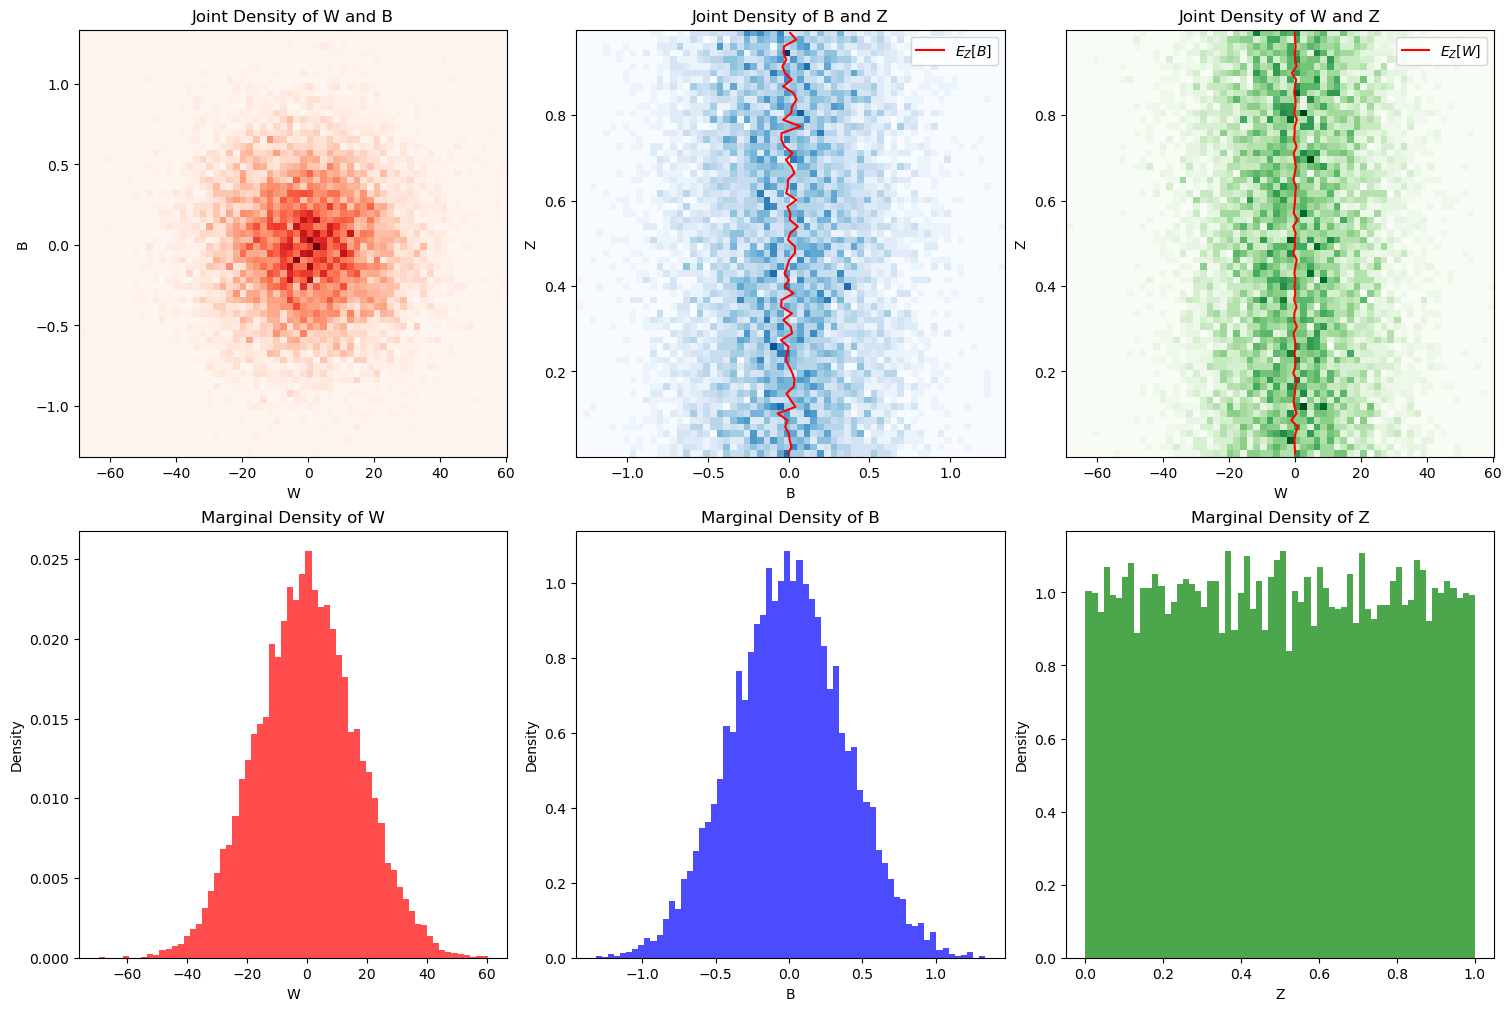

t = 0.199, KE = 103.11906, <WB> = 0.04176 



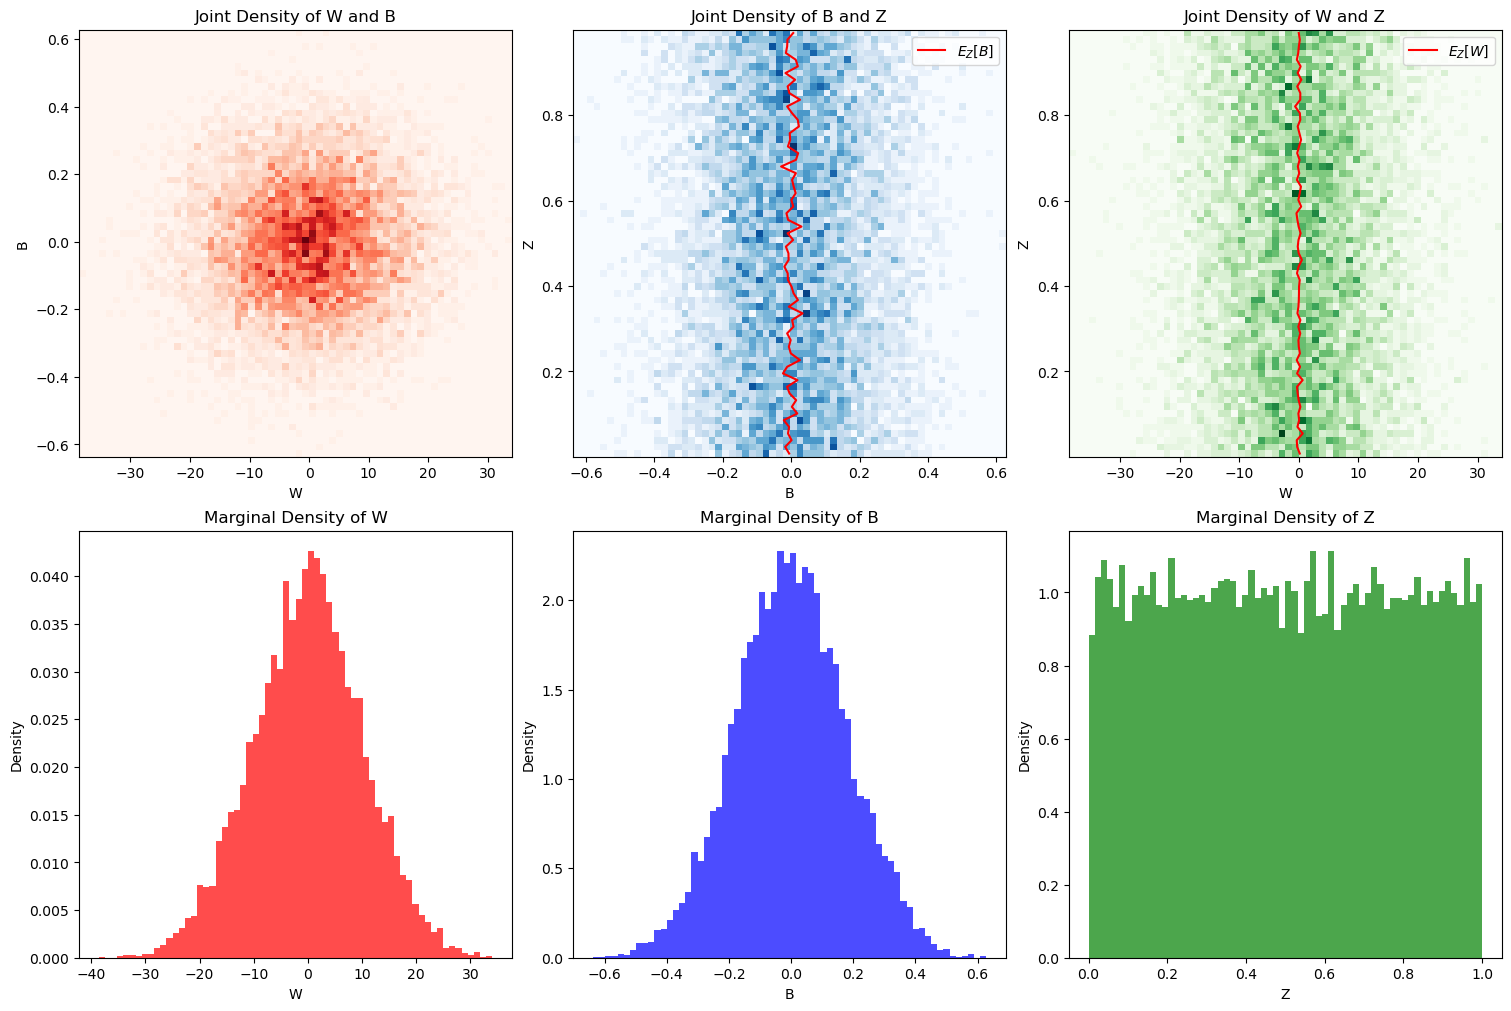

t = 0.298, KE = 35.85458, <WB> = 0.02583 



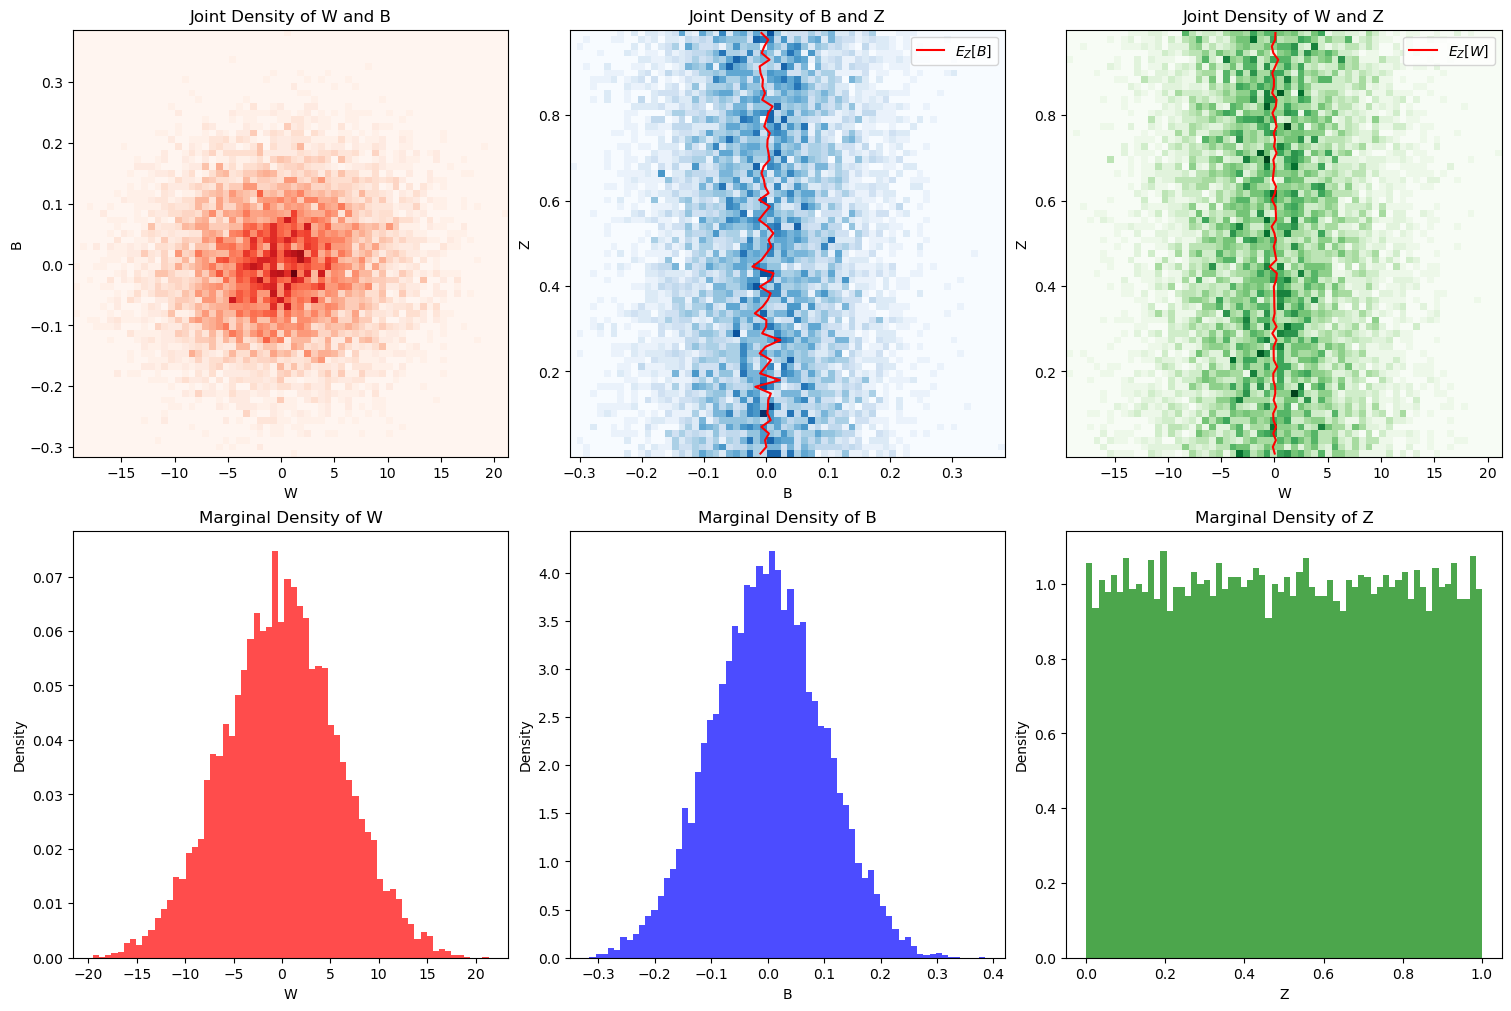

t = 0.398, KE = 14.32488, <WB> = 0.01118 



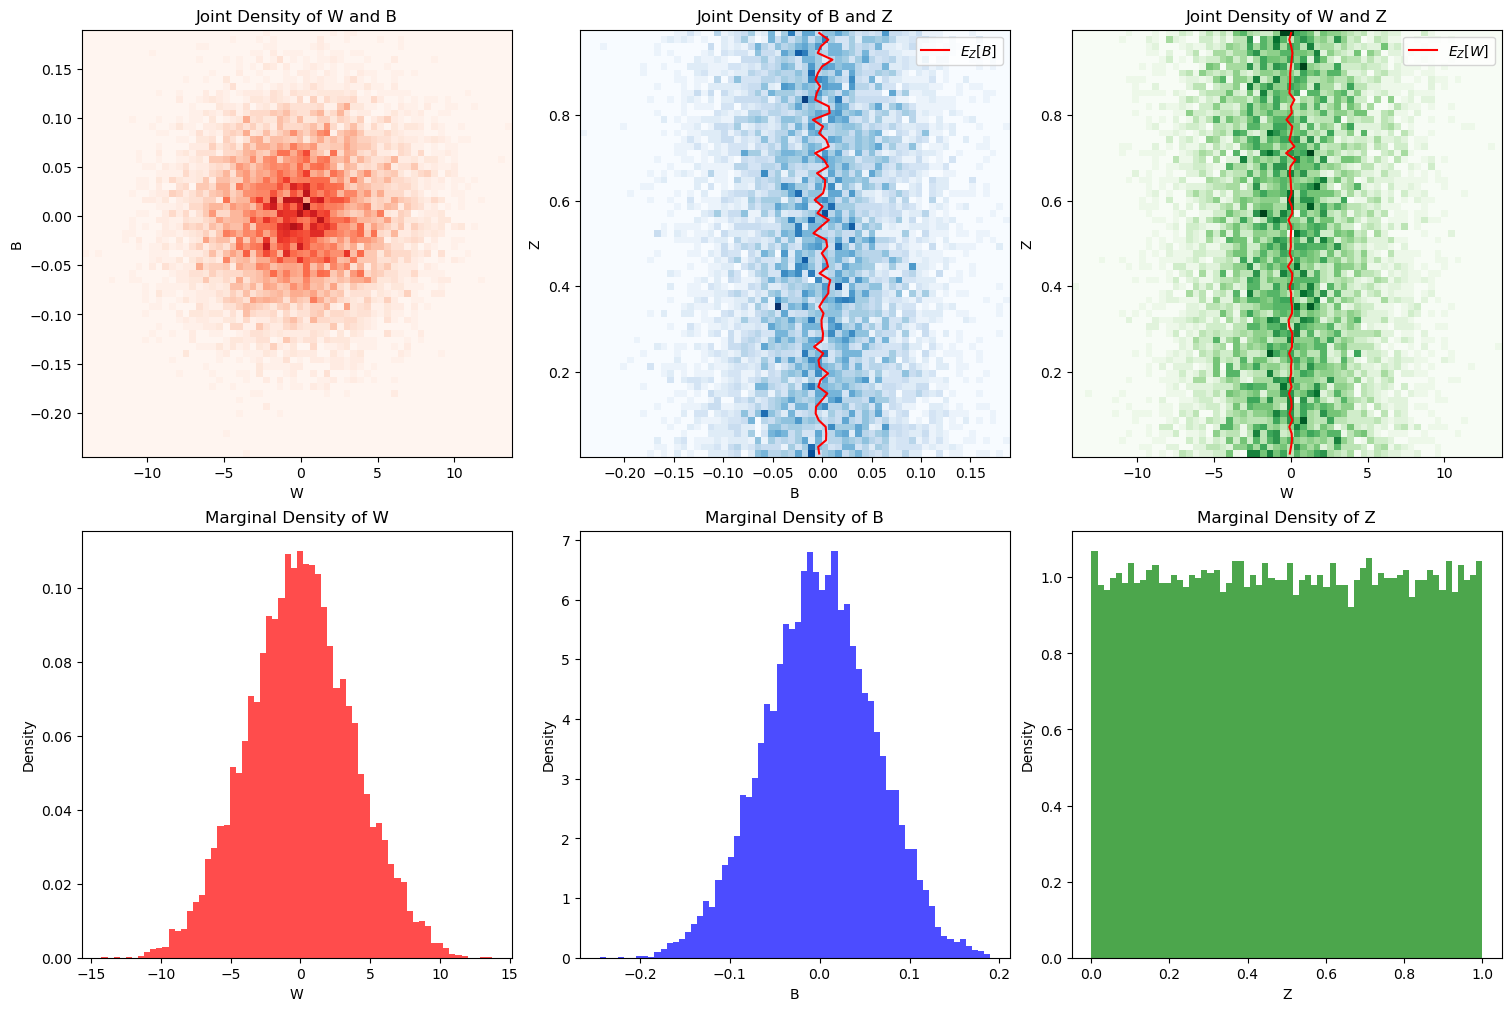

t = 0.497, KE = 6.57217, <WB> = 0.00528 



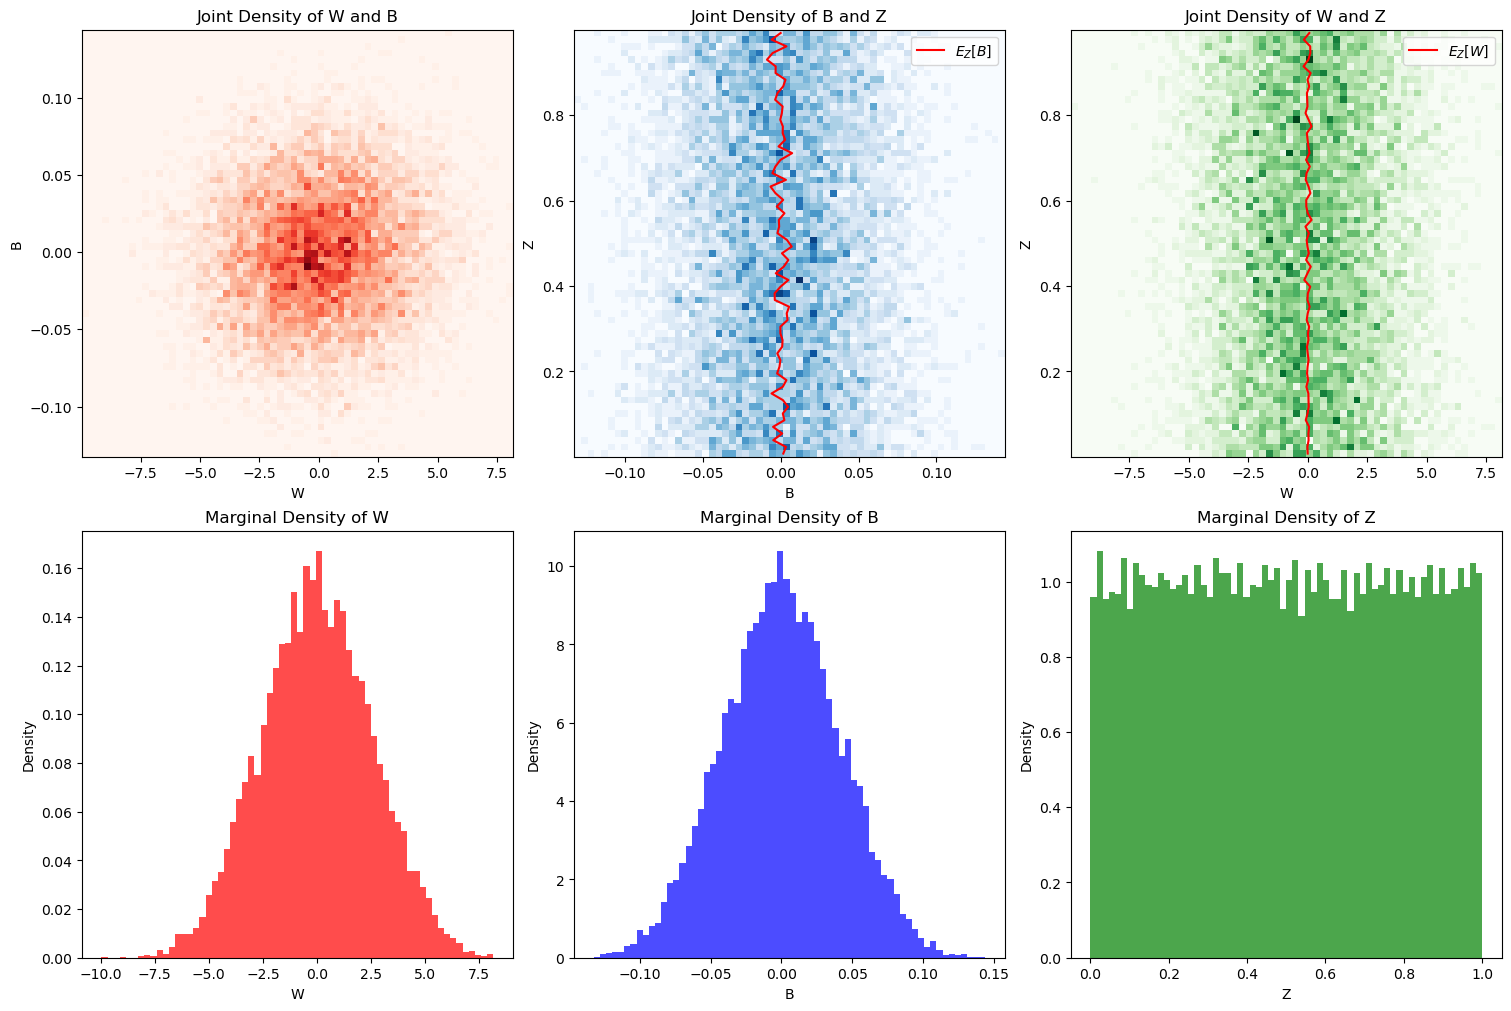

t = 0.597, KE = 3.52954, <WB> = 0.00261 



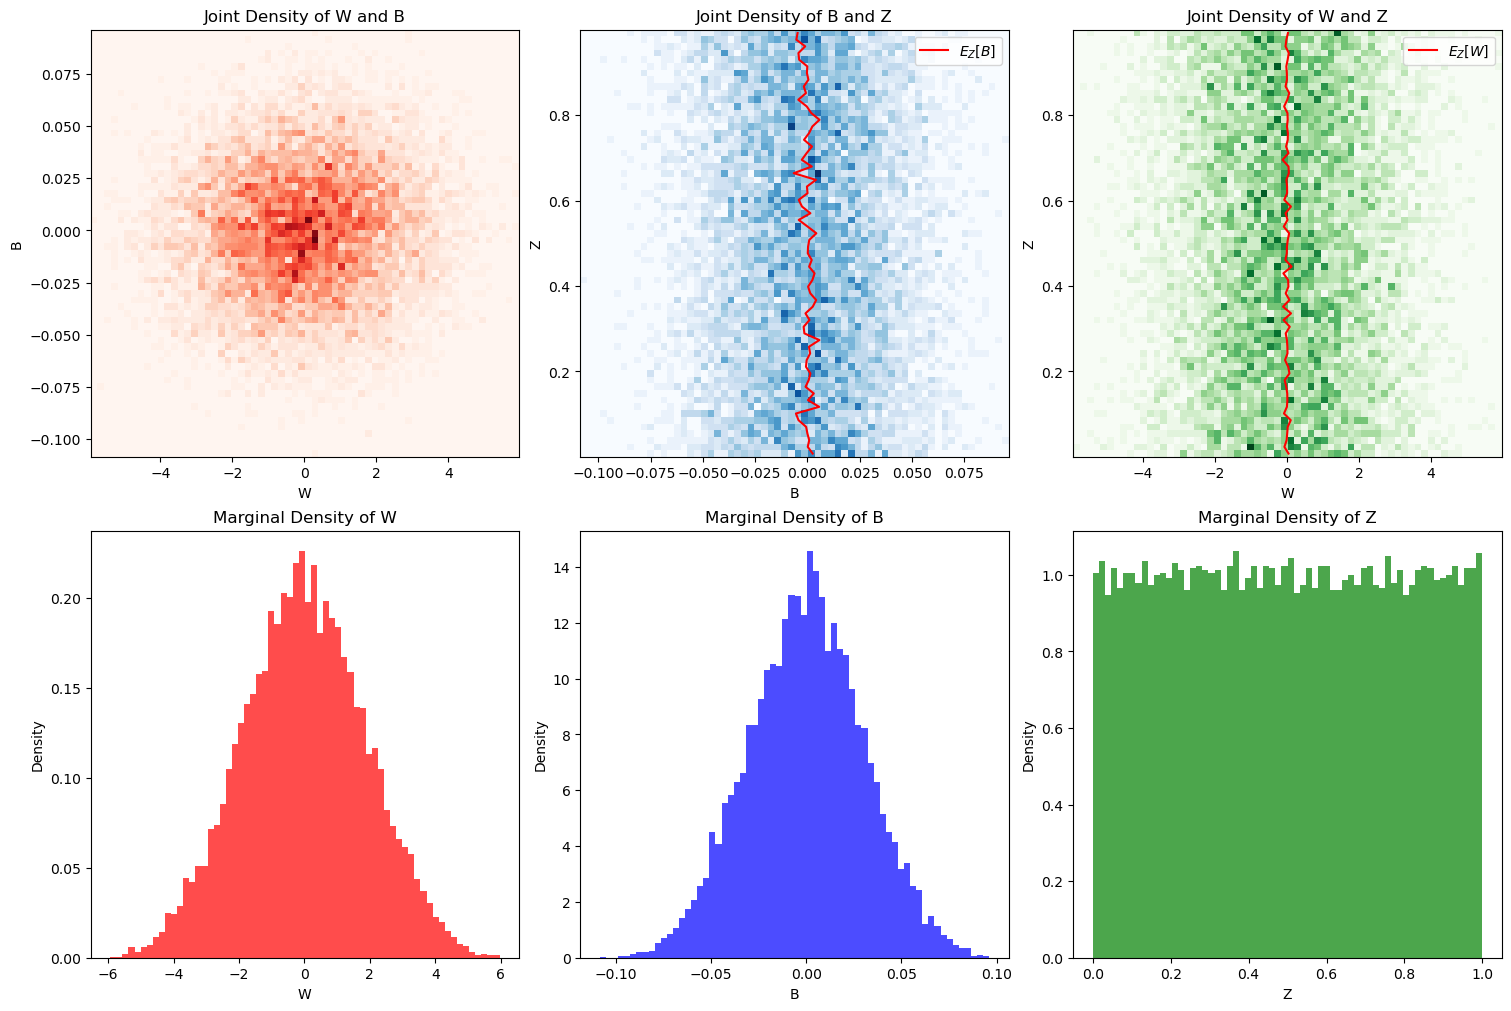

t = 0.697, KE = 2.18493, <WB> = 0.00141 



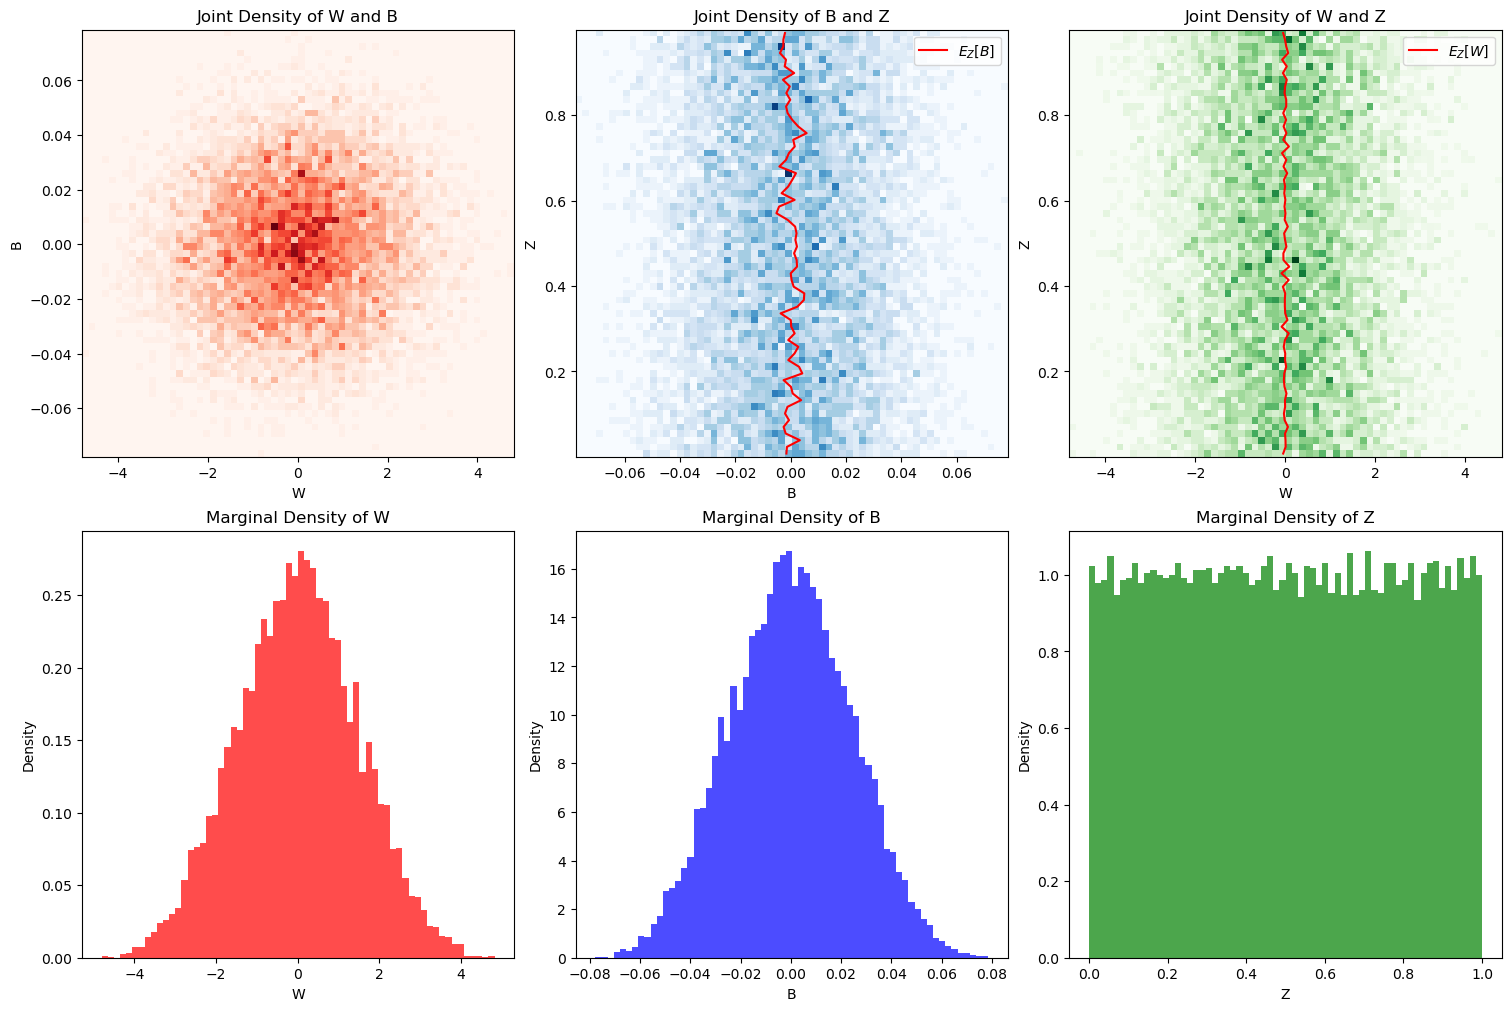

t = 0.796, KE = 1.52065, <WB> = 0.00098 



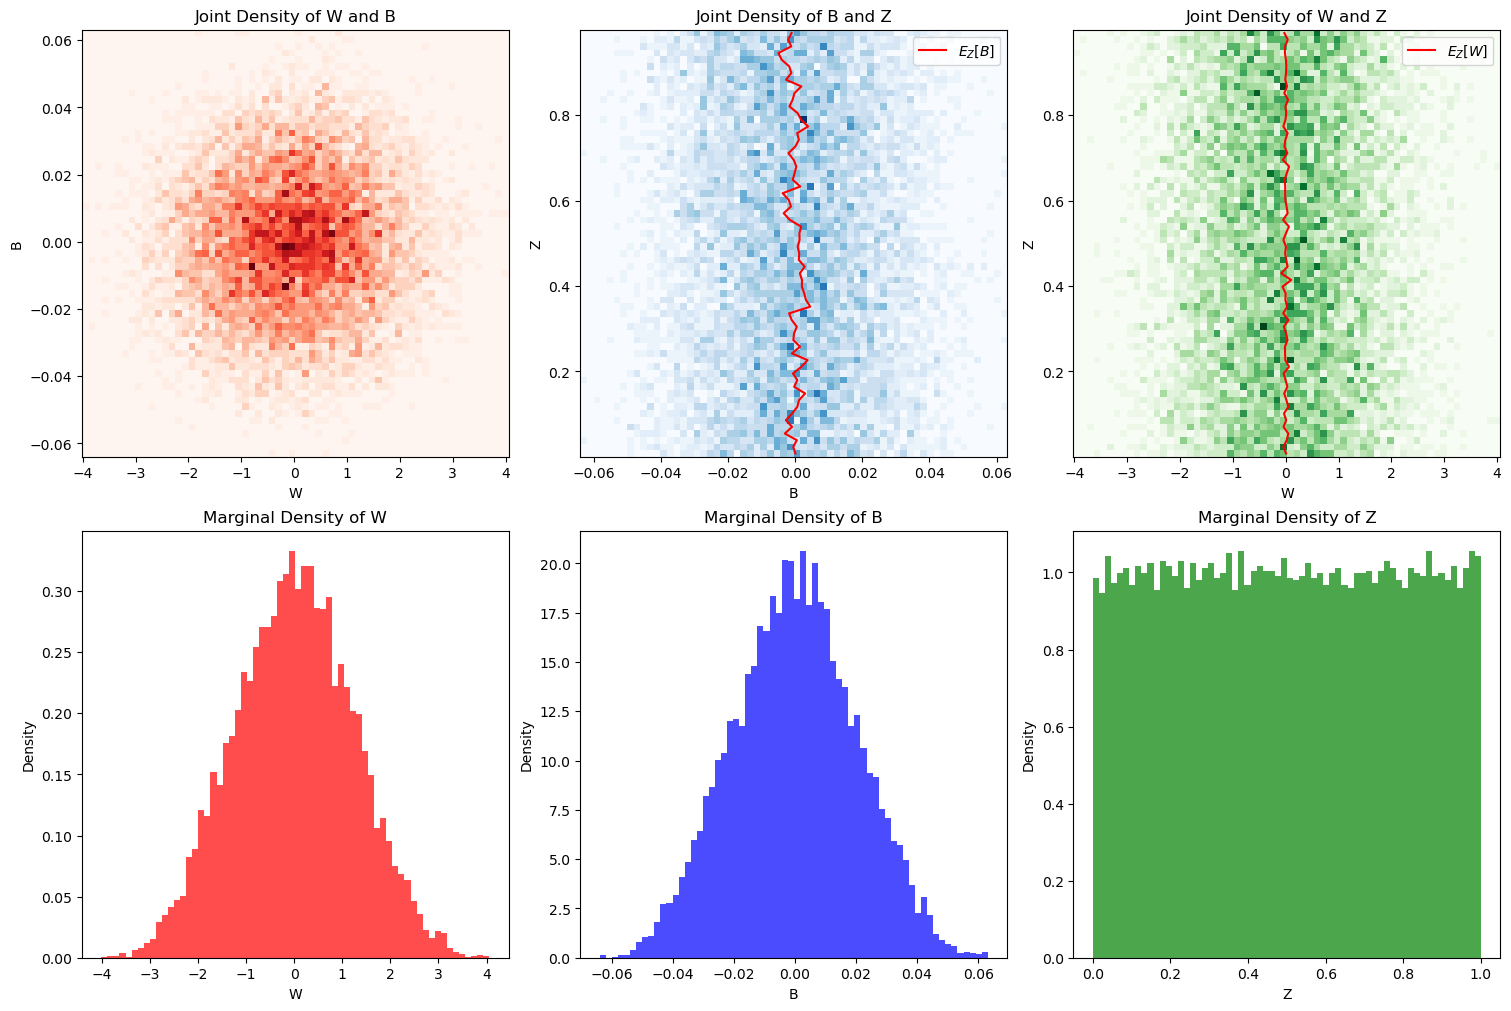

t = 0.896, KE = 1.16632, <WB> = 0.00076 



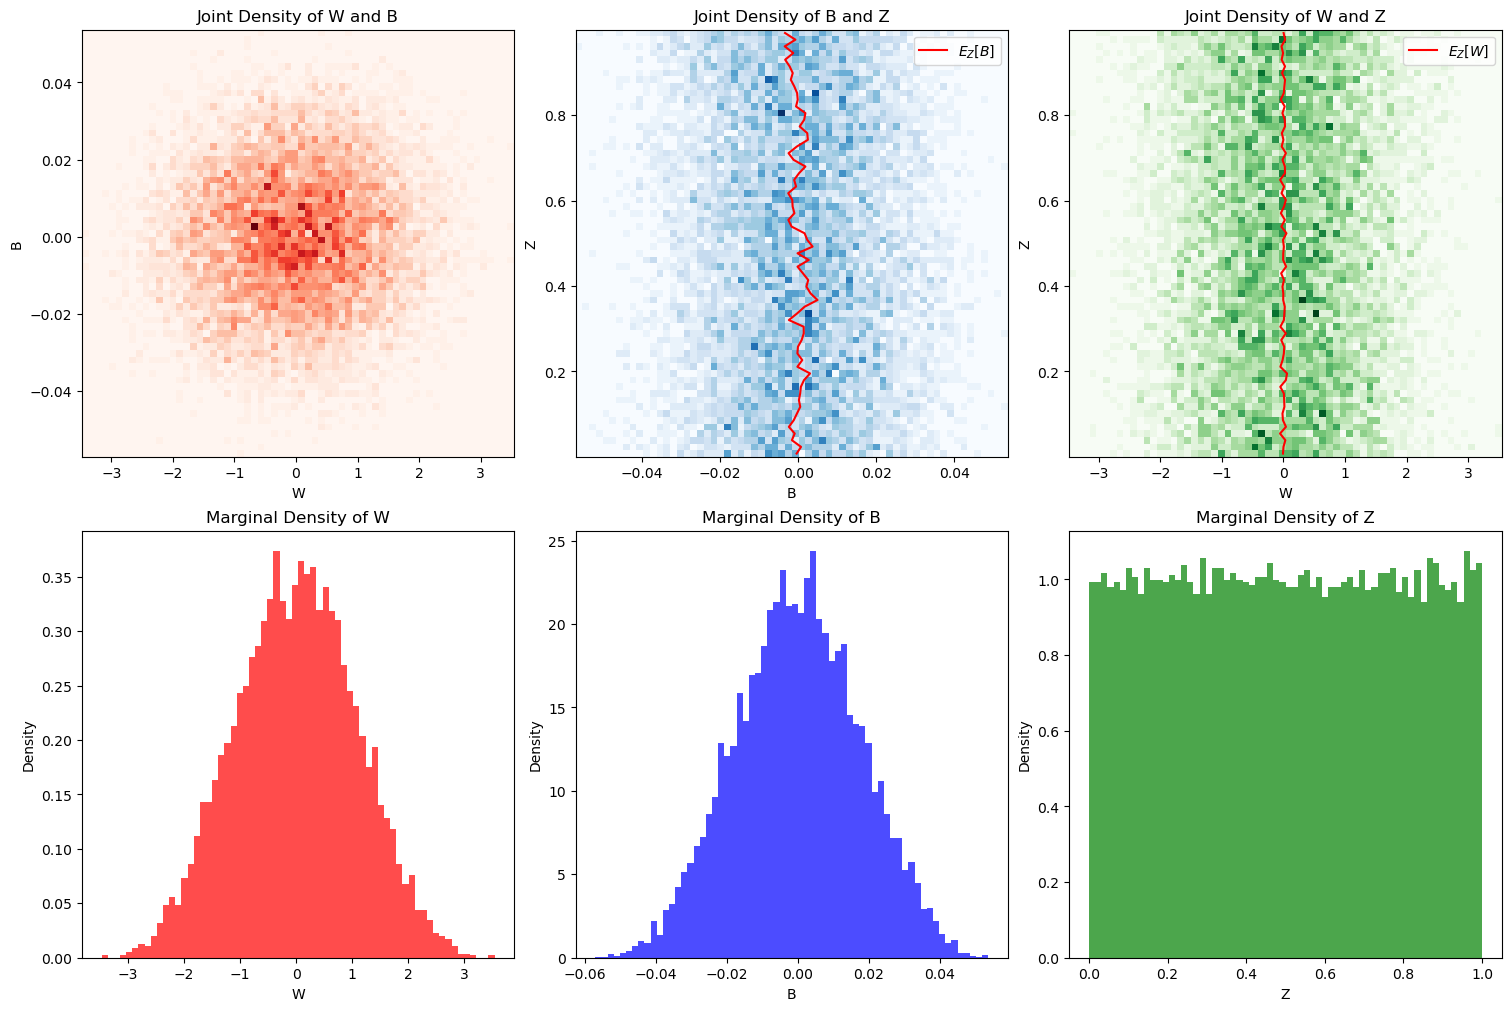

t = 0.995, KE = 0.95085, <WB> = 0.00064 



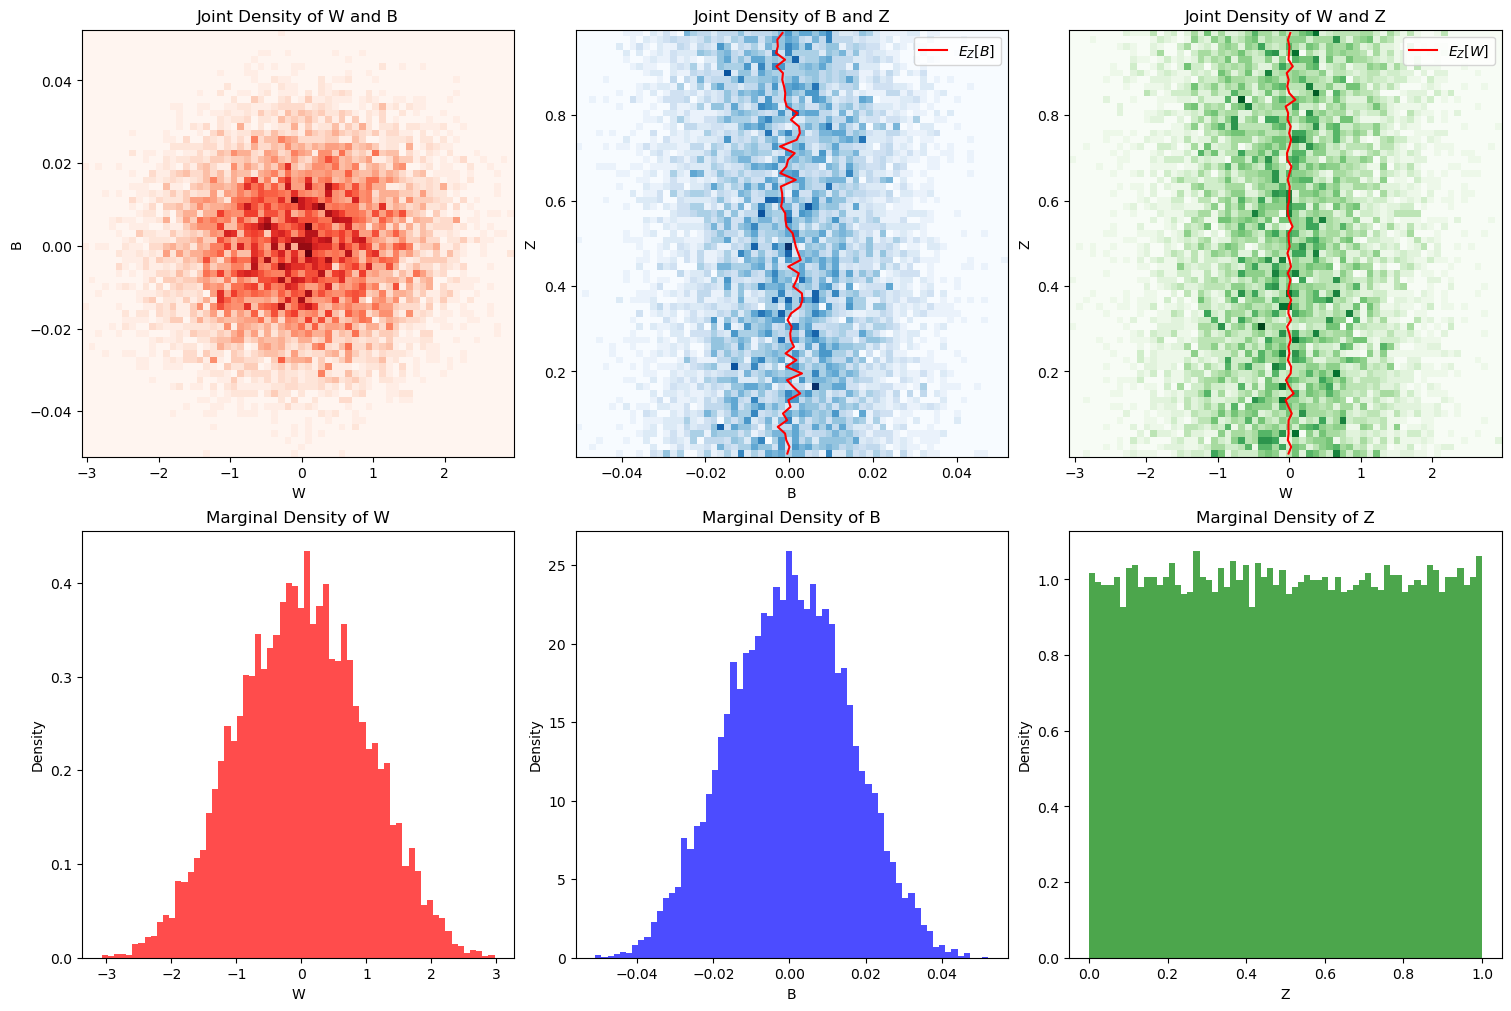

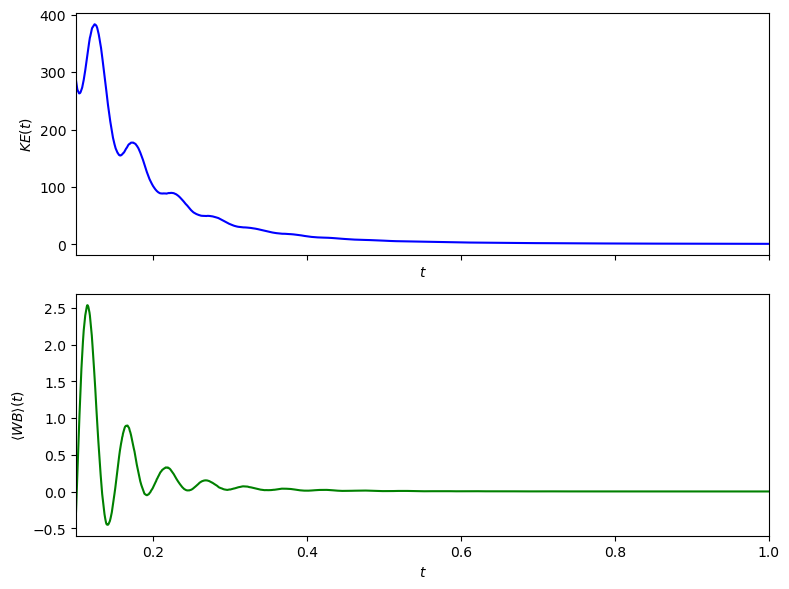

In [5]:
# 1m 20s
# Bins
N_bins = 64

# Particles 
N_particles = 10**4

# Time
T = 1
Δt= 5e-04

# Vertical
z, Δz = np.linspace(0,  1, 200 + 1, retstep=True)

# Run the solver
KE, WB, time = solver(T, Δt, z_grid=z, num_particles=N_particles, N_bins=N_bins, plot=True)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot x(t)
st = len(time)//10
axs[0].plot(time[st:], KE[st:], color='blue')
axs[0].set_ylabel(r'$KE(t)$')
axs[0].set_xlabel(r'$t$')
axs[0].set_xlim([time[st:][0],T])

# Plot y(t)
axs[1].plot(time[st:], WB[st:], color='green')
axs[1].set_ylabel(r'$\langle WB \rangle(t)$')
axs[1].set_xlabel(r'$t$')
axs[1].set_xlim([time[st:][0],T])

# Layout adjustment
plt.tight_layout()
plt.show()

# # Bins
# N_bins = 32

# # Particles 
# N_particles = 10**3

# # Time
# T = .1
# t, Δt = np.linspace(0,  T, 10**2, retstep=True)

# # Vertical
# z, Δz = np.linspace(0,  1, 100 + 1, retstep=True)

# # Timing the solver function
# import timeit
# number = 10
# execution_time = timeit.Timer(lambda: solver(T, Δt, z_grid=z, num_particles=N_particles, N_bins=N_bins)).repeat(repeat=number, number=1)
# print(f"Execution time: {np.mean(execution_time):.2f} seconds")

A refinment of this model would be to replace the IEM closure for the mixing model with the velocity conditioned or VCIEM. An efficient implementation of this is given below 

In [6]:

def conditional_mean_2D(X, Y, Z, y_grid, z_grid):
    """
    Calculate the conditional mean of X given Y and Z over specified bins.

    Parameters:
    X : numpy.ndarray
        The array of values for which the conditional mean is calculated.
    Y : numpy.ndarray
        The array of conditioning values for the first dimension.
    Z : numpy.ndarray
        The array of conditioning values for the second dimension.
    y_grid : numpy.ndarray
        The grid defining the bins for Y.
    z_grid : numpy.ndarray
        The grid defining the bins for Z.

    Returns:
    numpy.ndarray
        A 2D array containing the conditional mean of X for each combination of bins in y_grid and z_grid.
        If no values fall into a bin, the corresponding entry will be NaN.
    """
    EX_cYZ = np.zeros((len(y_grid), len(z_grid)))
    for i, y_i in enumerate(y_grid[:-1]): 
        
        for j, z_j in enumerate(z_grid[:-1]):
            
            # Find the mean of X in the bin y_{i-1} > Y, y_i and z_{j-1} > Z, z_j
            indx = np.where((Y >= y_grid[i]) & (Y < y_grid[i + 1]) & (Z >= z_grid[j]) & (Z < z_grid[j + 1]))[0]

            if len(indx) > 0:
                # Calculate the density in the bin
                EX_cYZ[i,j] = np.mean(X[indx])
            else:
                EX_cYZ[i,j] = np.nan
    

    # # Conditional means in 2D
    # from scipy import interpolate
    # w_grid = np.linspace(np.min(W[:, n - 1]), np.max(W[:, n - 1]), N_bins)
    # b_grid = np.linspace(np.min(B[:, n - 1]), np.max(B[:, n - 1]), N_bins)
    # z_grid = np.linspace(np.min(Z[:, n - 1]), np.max(Z[:, n - 1]), N_bins)

    # print(  'W grid:', w_grid)
    # print(  'B grid:', b_grid)
    # print(  'Z grid:', z_grid)

    # # Ensure grids are strictly ascending
    # w_grid = np.unique(w_grid)
    # b_grid = np.unique(b_grid)
    # z_grid = np.unique(z_grid)

    # EB_cWZ = conditional_mean_2D(X=B[:, n - 1], Y=W[:, n - 1], Z=Z[:, n - 1], y_grid=w_grid, z_grid=z_grid)
    # EW_cBZ = conditional_mean_2D(X=W[:, n - 1], Y=B[:, n - 1], Z=Z[:, n - 1], y_grid=b_grid, z_grid=z_grid)

    # # Interpolate the conditional means using RegularGridInterpolator
    # EB_cWZ_interp = interpolate.RegularGridInterpolator((w_grid[:-1], z_grid[:-1]), EB_cWZ, method='linear', bounds_error=False, fill_value=None)
    # EW_cBZ_interp = interpolate.RegularGridInterpolator((b_grid[:-1], z_grid[:-1]), EW_cBZ, method='linear', bounds_error=False, fill_value=None)

    # EB_cWZ = EB_cWZ_interp((B[:, n - 1], Z[:, n - 1]))
    # EW_cBZ = EW_cBZ_interp((B[:, n - 1], Z[:, n - 1]))

    return EX_cYZ